In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv("diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [33]:
df['outlook']=df['outlook'].map({'sunny':1, 'overcast':2,'rain':3})
df['temperature']=df['temperature'].map({'hot':1,'cool':2,'mild':3})
df['humidity']=df['humidity'].map({'high':1, 'normal':2})
df['wind']=df['wind'].map({'weak':1, 'strong':1})
df['play']=df['play'].map({'yes':1, 'no':0})
print(df)

KeyError: 'outlook'

In [34]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols] # Predictors
y = df.Outcome # Target variable

# Split dataset into training set and test set, 80% training and 20% test
from sklearn.model_selection import train_test_split # Import
# train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 614
Length of X_test is: 154
Length of y_train is: 614
Length of y_test is: 154


In [35]:
from sklearn.naive_bayes import GaussianNB
#Import Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train,y_train) # Train Naive Bayes Classifier

# Make predictions on the test set
y_pred = model.predict(X_test) #Predict the response for test dataset

#Model Evaluation using Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("Accuracy:",accuracy_score(y_test, y_pred))
print('\nConfusion Matrix\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.7922077922077922

Confusion Matrix
 [[88 11]
 [21 34]]


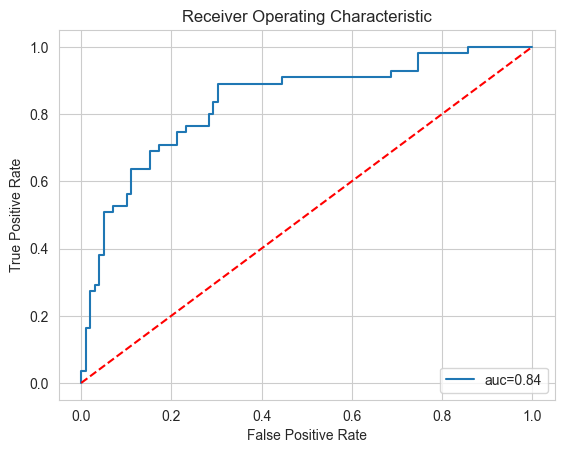

In [36]:
#Model Evaluation using ROC curve
#Draw ROC curve
import matplotlib.pyplot as plt
from sklearn import metrics
plt.title('Receiver Operating Characteristic')
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="auc=%0.2f" %auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
dataToPredict= np.array([[1,2,1,1,1,1,1]])
pred=model.predict(dataToPredict)
print("\n Predicted Result: ", pred)


 Predicted Result:  [0]


C:\Users\matth\Documents\GitHub\410Labs\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
